In [1]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, d

(-0.0, 0.3)

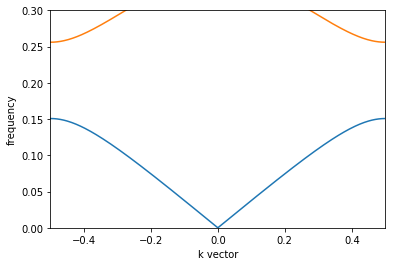

In [2]:
n=401          # number of grid nodes

dx=1.0/n         # discretization step, domain size = 1

eps1 = 1.      # Layer 1
eps2 = 13.0       # Layer 2
ratio = 0.5

nmodes = 6   # Solver for first # eigenmodes

epscol = np.ones(n) # vectro representation
epscol[:int(n*ratio)] = 1.0/eps1
epscol[int(n*ratio):] = 1.0/eps2

epsinv = sp.sparse.dia_matrix(([epscol], [0]), [n,n]) #convert to diagonal matrix

# Prepare forward and backward difference operators
diag = np.ones(n) * -1.0/dx+0.j
up_diag = np.ones(n) * 1.0/dx+0.j

Fd = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])
Bd = sp.sparse.dia_matrix(([diag, up_diag], [-1, 0]), [n,n])

# Convert to lil_matrix to allow per element access.
F = sp.sparse.lil_matrix(Fd)
B = sp.sparse.lil_matrix(Bd)

kk0 = 2*sp.pi*np.linspace(-0.5,0.5,301)+0.0j

k = np.zeros((nmodes, kk0.size), dtype=complex)
for ik in range(kk0.size):
    k0=kk0[ik]
    bc = np.exp(1.j*k0*1)/dx # to impose periodic boundary conditions    
    F[n-1, 0] = bc     
    B[0, n-1] = -np.conj(bc)
    q = -epsinv*B*F; # to assemble eigenmatrix
    # eigs can be provided a guess solution as a starting point,
    # use k=w/c by mean value of epsilon
    kt = k0/np.sqrt((eps1*ratio+eps2*(1-ratio))); 
    k2, V = linalg.eigs(q, k=nmodes, M=None, sigma=kt**2)
    
    k[:,ik] = np.sqrt(k2) # k=w/c

for i in range(nmodes):
    plt.hold(True)
    plt.plot(kk0/(2*sp.pi), np.real(k[i,:]/(2*sp.pi)) ,'-')
    
plt.xlabel("k vector")
plt.ylabel("frequency")
plt.xlim([-0.5, 0.5])
plt.ylim([-.0, 0.3])
